# Part II - (Loan Data From Prosper)
## by (CHIMA CALEB C)

## Investigation Overview

In this investigation, I wanted to look at the characteristics of the data to answer the following questions
- What factors affect a loan’s outcome status?
- What affects the borrower’s APR or interest rate?
- Are there differences between loans depending on how large the original loan amount was?

## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

`NB`
This data (dictionary) explains the variables in the data set.
the Focus of this analysis is basically  on about 15 of the the features.

In [23]:
#importing parkages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)
warnings.filterwarnings("ignore")

In [24]:
#Loading the Dataset
data = pd.read_csv("prosperLoanData.csv")
#loading the data Dictionary as well for easy reference
data_dict = pd.read_csv("Prosper Loan Data - Variable Definitions - Sheet1.csv")

From acessing the above, i have choosed the following features to be used for my analysis
- 
LoanOriginationDate
LoanOriginalAmount
LoanOriginationQuarter
Term
LoanStatus
BorrowerAPR
BorrowerRate
LenderYield
CreditScoreRangeLower
CreditScoreRangeUpper
ListingCategory
BorrowerState
Occupation
EmploymentStatus
EmploymentStatusDuration
IsBorrowerHomeowner

In [25]:
data_ = data[['LoanOriginationDate','LoanOriginalAmount','LoanOriginationQuarter','Term','LoanStatus',
'BorrowerAPR','BorrowerRate','LenderYield','CreditScoreRangeLower','CreditScoreRangeUpper','ListingCategory (numeric)',
'BorrowerState','Occupation','EmploymentStatus','EmploymentStatusDuration','IsBorrowerHomeowner']]
data_.head(10)

,LoanOriginationDate,LoanOriginalAmount,LoanOriginationQuarter,Term,LoanStatus,BorrowerAPR,BorrowerRate,LenderYield,CreditScoreRangeLower,CreditScoreRangeUpper,ListingCategory (numeric),BorrowerState,Occupation,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner
0,2007-09-12 00:00:00,9425,Q3 2007,36,Completed,0.16516,0.1580,0.1380,640.0,659.0,0,CO,Other,Self-employed,2.0,True
1,2014-03-03 00:00:00,10000,Q1 2014,36,Current,0.12016,0.0920,0.0820,680.0,699.0,2,CO,Professional,Employed,44.0,False
2,2007-01-17 00:00:00,3001,Q1 2007,36,Completed,0.28269,0.2750,0.2400,480.0,499.0,0,GA,Other,Not available,NaN,False
3,2012-11-01 00:00:00,10000,Q4 2012,36,Current,0.12528,0.0974,0.0874,800.0,819.0,16,GA,Skilled Labor,Employed,113.0,True
4,2013-09-20 00:00:00,15000,Q3 2013,36,Current,0.24614,0.2085,0.1985,680.0,699.0,2,MN,Executive,Employed,44.0,True
5,2013-12-24 00:00:00,15000,Q4 2013,60,Current,0.15425,0.1314,0.1214,740.0,759.0,1,NM,Professional,Employed,82.0,True
6,2013-04-18 00:00:00,3000,Q2 2013,36,Current,0.31032,0.2712,0.2612,680.0,699.0,1,KS,Sales - Retail,Employed,172.0,False
7,2013-05-13 00:00:00,10000,Q2 2013,36,Current,0.23939,0.2019,0.1919,700.0,719.0,2,CA,Laborer,Employed,103.0,False
8,2013-12-12 00:00:00,10000,Q4 2013,36,Current,0.07620,0.0629,0.0529,820.0,839.0,7,IL,Food Service,Employed,269.0,True
9,2013-12-12 00:00:00,10000,Q4 2013,36,Current,0.07620,0.0629,0.0529,820.0,839.0,7,IL,Food Service,Employed,269.0,True


The dataset appears unclean, so i need to clean and make it ready for analysis
- 
- convert laonOriginationDate to datetime
- clean off date from loanoriginalquarter
- Convert ListingCategory (numeric) to a corresponding alphabetical values since its use to represent state
- Fill up the null values with zero (0)

In [26]:
def cleaning(dat):
    dat['LoanOriginationDate'] = dat['LoanOriginationDate'].map(lambda x: str(x)[:-8])
    dat['LoanOriginationQuarter'] = dat['LoanOriginationQuarter'].map(lambda x: str(x)[:-4])
    dat=dat.replace({'ListingCategory (numeric)':{1:'A',2:'B',3:'C',4:'D',5:'E',6:'F',7:'G',8:'H',9:'I',10:'J',
                                              11:'K',12:'L',13:'M',14:'N',15:'O',16:'P',17:'Q',18:'R',19:'S',20:'T'}})
    dat.fillna(0,inplace = True)
    return dat

In [27]:
data_ =cleaning(data_)

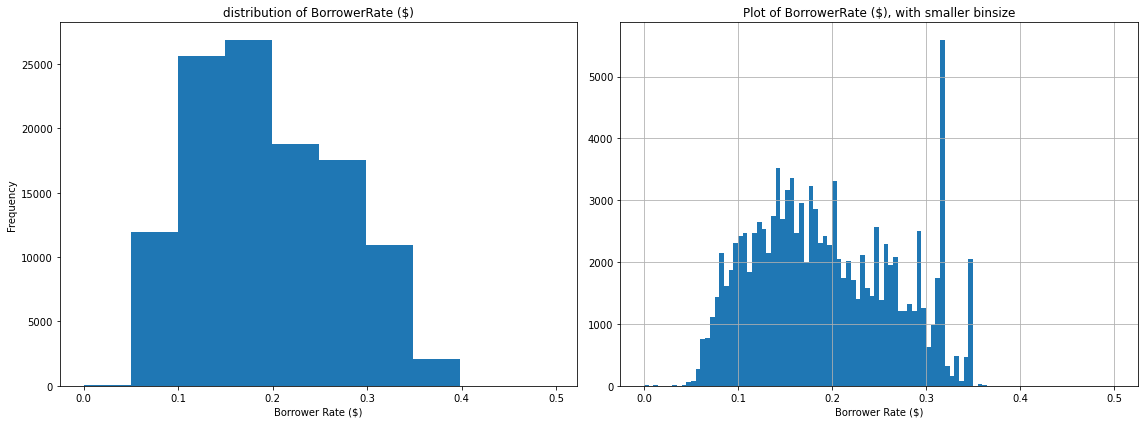

In [28]:
binsize = 0.003
bins = np.arange(0, data_['BorrowerRate'].max()+binsize, .005)
plt.figure(figsize=[16,6])

plt.subplot(1,2,1)
data_.BorrowerRate.plot(kind = "hist");
plt.xlabel('Borrower Rate ($)')
plt.title("distribution of BorrowerRate ($)");


plt.subplot(1,2,2)
data_.BorrowerRate.hist(bins = bins)
plt.xlabel('Borrower Rate ($)')
plt.title("Plot of BorrowerRate ($), with smaller binsize");


The data appears schewed to the right but when i applied a smaller bin to it on the second plot, you see that the data appears to be a normal distribution with lots of spikes which might be as a result of outliers(suspected) or different anual percentage rate attarched to each person based on the volumn of his/her laon

Next feature to be explored is Borrower Sate, Listing Category, and occupation

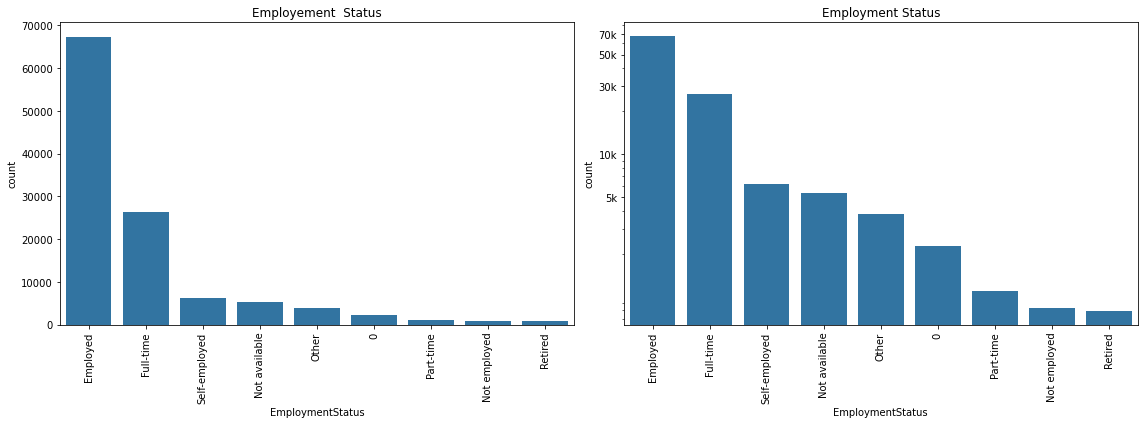

In [29]:
plt.figure(figsize=[16,6])
default_color = sb.color_palette()[0]
plt.subplot(1,2,1)
sb.countplot(data = data_, x = 'EmploymentStatus', color = default_color, order = data_['EmploymentStatus'].value_counts().index);
plt.title("Employement  Status")
# plt.yscale('log')
# plt.yticks([10, 1e2, 1e3, 1e4], [10, 100, '1k', '10k'])
plt.xticks(rotation =90);

plt.subplot(1,2,2)
sb.countplot(data = data_, x = 'EmploymentStatus', color = default_color, order = data_['EmploymentStatus'].value_counts().index);
plt.title("Employment Status")
plt.yscale('log')
plt.yticks([5e3, 10e3, 30e3, 50e3,70e3], ['5k','10k', '30k', '50k', '70k'])
plt.xticks(rotation =90);

This shows that the borrowers which are employed tends to be of higher proportion than others 

NB: the Zero(0) plotted is as a rsult of the null values i used to fill up the missing space instead of dropping them off to avoid interfaring with someother features

In [30]:
# selecting numerical features to be plottd
x = data_[['LoanOriginalAmount','BorrowerAPR','BorrowerRate','LenderYield','CreditScoreRangeLower','CreditScoreRangeUpper']]

# Bivariate Eploration

plot matrix of numeric features ['LoanOriginalAmount', 'BorrowerAPR'] against categorical features.

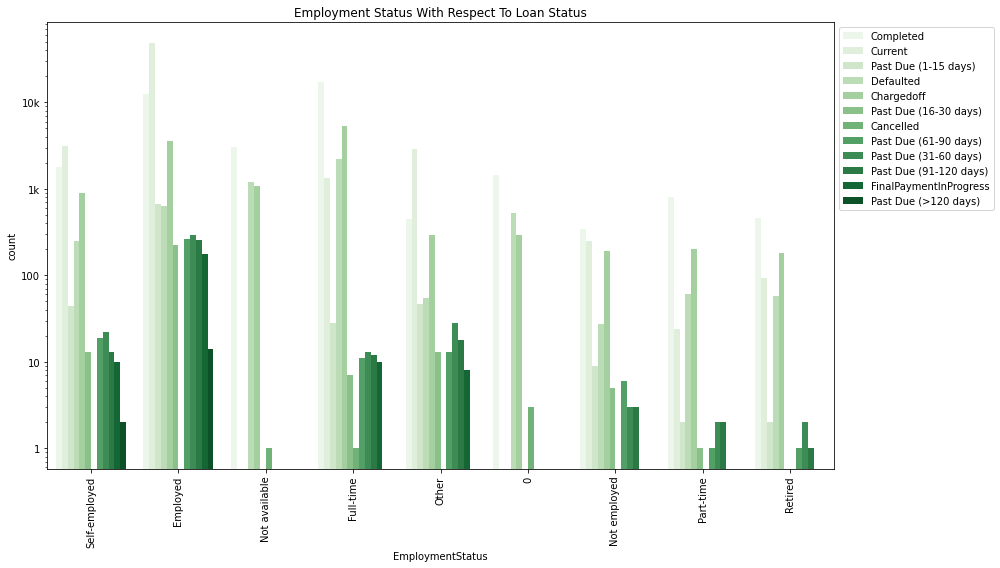

In [31]:
plt.figure(figsize = (14,8))
sb.countplot(data = data_, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Greens')
plt.yscale('log')
plt.yticks([1, 1e1, 1e2, 1e3, 1e4], [1,10, 100, '1k', '10k'])
plt.title("Employment Status With Respect To Loan Status")
plt.legend(bbox_to_anchor =(1, 1)) # re-arrange legend to remove overlapping
plt.xticks(rotation = 90)

plt.show()

- Employment status:
    The Employment status has great impact on the loan status, on a closer look i observed that those are Not Employed, Retired and part-time dosent complet their laons.

    Some of the distributions apears same though deffers in different aspect, they seem not to be cancealing loans for those that are Eemployed and self employed as well  they also have a greater population among others... the cancealliation of loan seem to be more for the Retired borrowers than others, therefore Employment status has great impact on the Status of the loan.

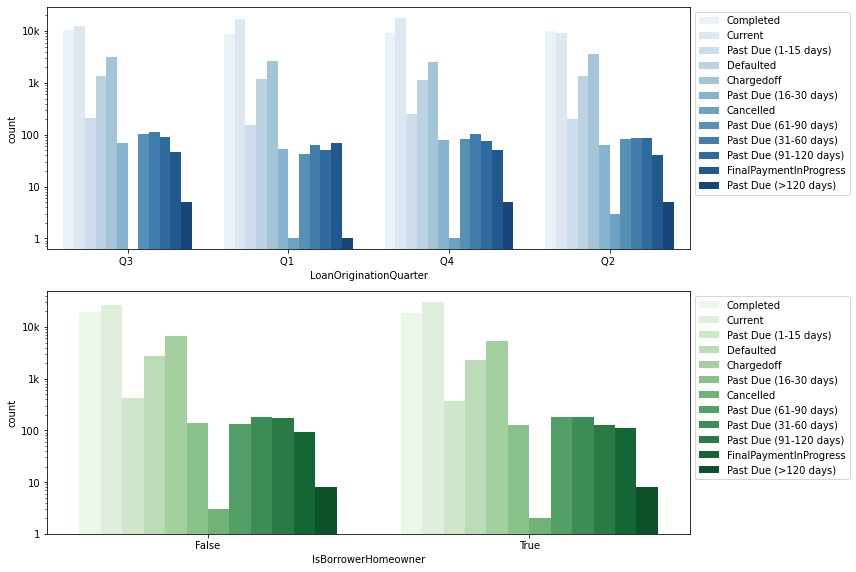

In [32]:
# since there's only three subplots to create, using the full data should be fine.
plt.figure(figsize = [12, 12])

# subplot 1: color vs cut
plt.subplot(3, 1, 2)
sb.countplot(data = data_, x = 'LoanOriginationQuarter', hue = 'LoanStatus', palette = 'Blues')
plt.yscale('log')
plt.yticks([1, 1e1, 1e2, 1e3, 1e4], [1,10, 100, '1k', '10k'])
plt.legend(bbox_to_anchor =(1, 1)) # re-arrange legend to remove overlapping


ax = plt.subplot(3, 1, 3)
sb.countplot(data = data_, x = 'IsBorrowerHomeowner', hue = 'LoanStatus', palette = 'Greens')
plt.yscale('log')
plt.yticks([1, 1e1, 1e2, 1e3, 1e4], [1,10, 100, '1k', '10k'])
plt.legend(bbox_to_anchor =(1, 1)) # re-arrange legend to reduce overlapping

plt.show()

    - Employment status:
    The Employment status has great impact on the loan status, on a closer look i observed that those are Not Employed, Retired and part-time dosent complet their laons.
    
    Some of the distributions apears same though deffers in different aspect, they seem not to be cancealing loans for those that are Eemployed and self employed as well  they also have a greater population among others... the cancealliation of loan seem to be more for the Retired borrowers than others, therefore Employment status has great impact on the Status of the loan.

- Is Borrower Home Owner:
the distribution Loan status among populations that own a home/morgage and those who does'nt appears thesame except Past_due_(31-60 days) and Past_due_(61-90 days) appears thesame for those that owne a home but (past due 31-60 and 91-120) appeears to have thesame number of counts. therefore i can say that it dosent really have much impart on the Loan Status
    
- Loan Origination Quarteer:
From the above the distribution of the four quarters (Q1,Q2,Q3 and Q4) appears to be thesame exccept Quarter 2 has greater population of completed loan status unlike other quarters that current of greater population, and secondly Quarter 3(Q3) seems not to have a cancealled loan status, therefore i can say that it does have a slight impact on the laon status
  
    
NB: zero (0) represents the null values presnt in the dataset, i used fill it up.

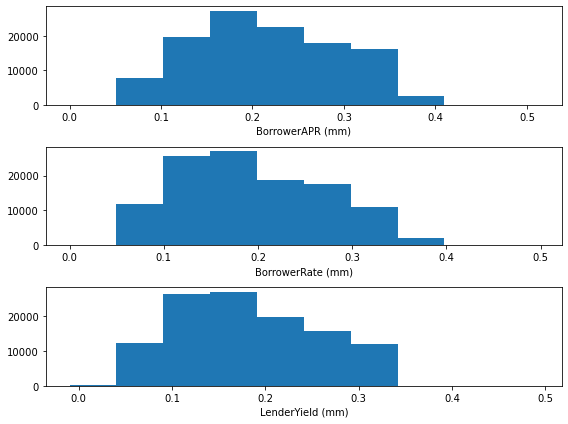

In [33]:
fig, ax = plt.subplots(nrows=3, figsize = [8,6])

variables = ['BorrowerAPR','BorrowerRate','LenderYield']
for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(data_[var]), max(data_[var])+0.2, 0.2)
    ax[i].hist(data = data_, x = var)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

the above shows a distribution of the 'BorrowerAPR','BorrowerRate'and 'LenderYield'
- 
the shape of the 'BorrowerAPR','BorrowerRate'and 'LenderYield' distributions are very similar to one another. The LenderYield distribution just looks slightly different since it takes a smaller range of values,
It's likely that these variables will be highly correlated with one another, and probably have a strong correlation with Loan Status

Next is plot matrix: sample 500 data_ so that plots are clearer and and can render faster

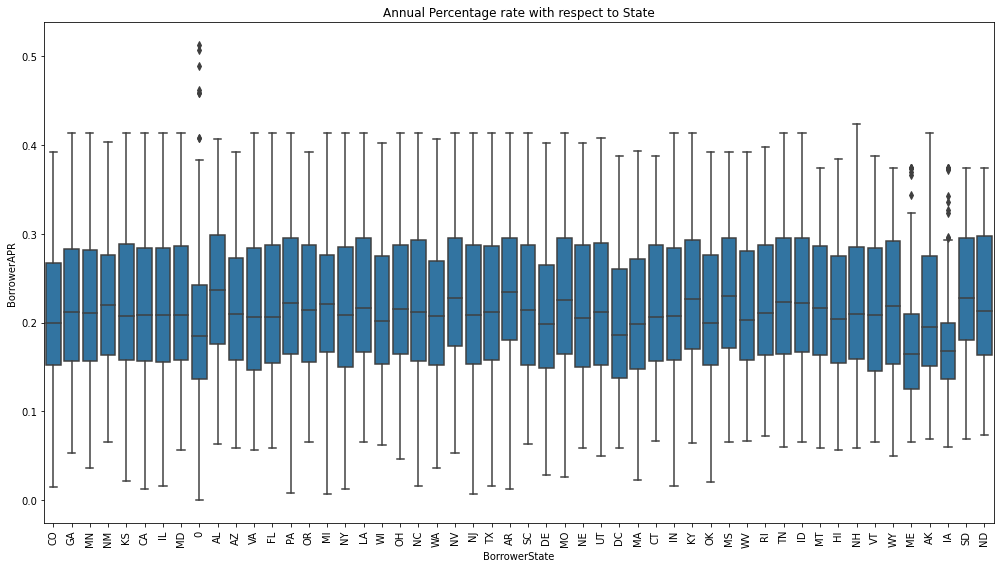

In [34]:
# data_.BorrowerState.value_counts().plot(kind = 'bar')
plt.figure(figsize = (14,8))
sb.boxplot(data =data_, x = 'BorrowerState', y = 'BorrowerAPR', color = default_color)
plt.title("Annual Percentage rate with respect to State")
plt.xticks(rotation = 90);

It is clear that Borrowers sate has agreat impact on the annual percentage rate since some states tends to have different annual percentage rate

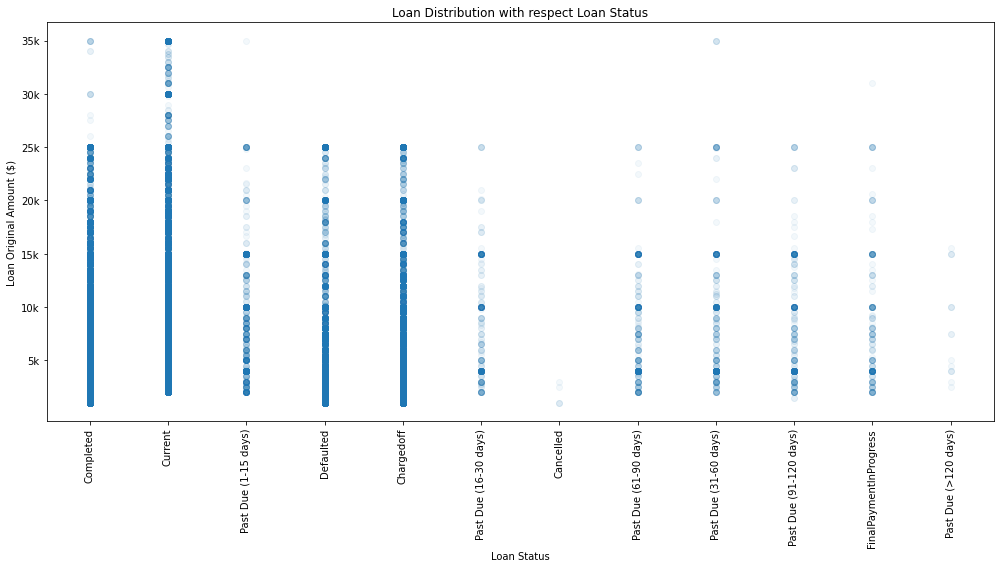

In [35]:
# plt.subplot(1,1,1)
plt.figure(figsize = [14, 8])
plt.scatter(data = data_, x = 'LoanStatus', y = 'LoanOriginalAmount', alpha = 0.05)
# plt.xlim([0, 3.5])
plt.xlabel('Loan Status')
# plt.yscale('log')
plt.xticks(rotation = 90)
plt.yticks([5e3, 10e3, 15e3, 20e3, 25e3, 30e3, 35e3], ['5k', '10k', '15k', '20k', '25k', '30k', '35k'])
plt.ylabel('Loan Original Amount ($)')
plt.title("Loan Distribution with respect Loan Status")
plt.show()


    - A closer look shows that greater population of those who completed their laons borrowed smaller ammount,   and also PAST DUE(91-120 days), DEFAULTED and CHARGEDOFF are relatively from those who borrowed higher amount 
    
 and also Borrowers with their past Dues greater than 120days and also those which their loan has been cancealled tend to have borrowed smaller amount and also on    applying a smaller alpha value shows that they are of smaller population.
    
- Therfore  the loan orignal amount has great impact on the loan status

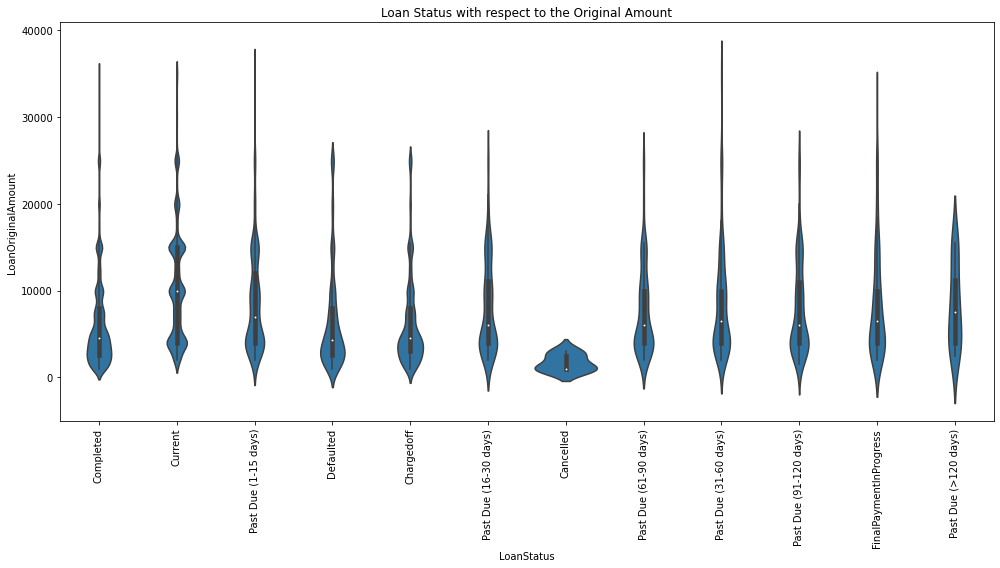

In [36]:


# plt.subplot(1,2,2)
plt.figure(figsize = [14, 8])
base_color = sb.color_palette()[0]
sb.violinplot(data = data_, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);
plt.title("Loan Status with respect to the Original Amount")
plt.xticks(rotation = 90);

## Multivariate Exploration.

In [37]:
# compute the logarithm of price to make multivariate plotting easier
def log_trans(x, inverse = False):
    """ quick function for computing log and power operations """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

data_['log_LoanAmount'] = data_['LoanOriginalAmount'].apply(log_trans)

In [38]:
def cuberoot_trans(x, inverse = False):
    """ quick function for computing cube root and cube operations """
    if not inverse:
        return x ** (1/3)
    else:
        return x ** 3

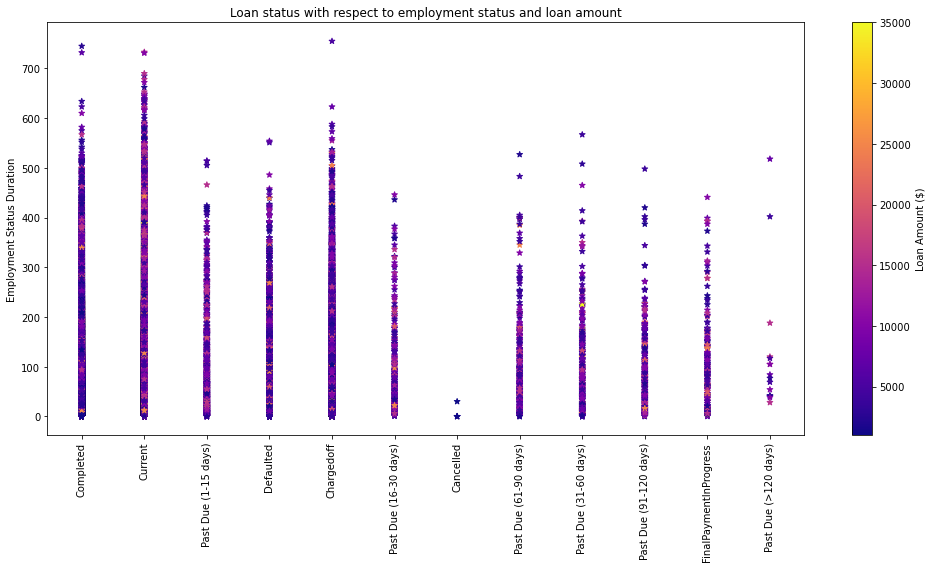

In [39]:
plt.rcParams["figure.figsize"] = [14, 8]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
x = data_['LoanStatus']
y = data_['EmploymentStatusDuration']
s = ax.scatter(x, y,c = data_['LoanOriginalAmount'], marker='*', cmap='plasma', alpha = 1)
fig.colorbar(s, label = 'Loan Amount ($)')
plt.title("Loan status with respect to employment status and loan amount")
plt.ylabel("Employment Status Duration")
plt.xticks(rotation = 90)
plt.show()



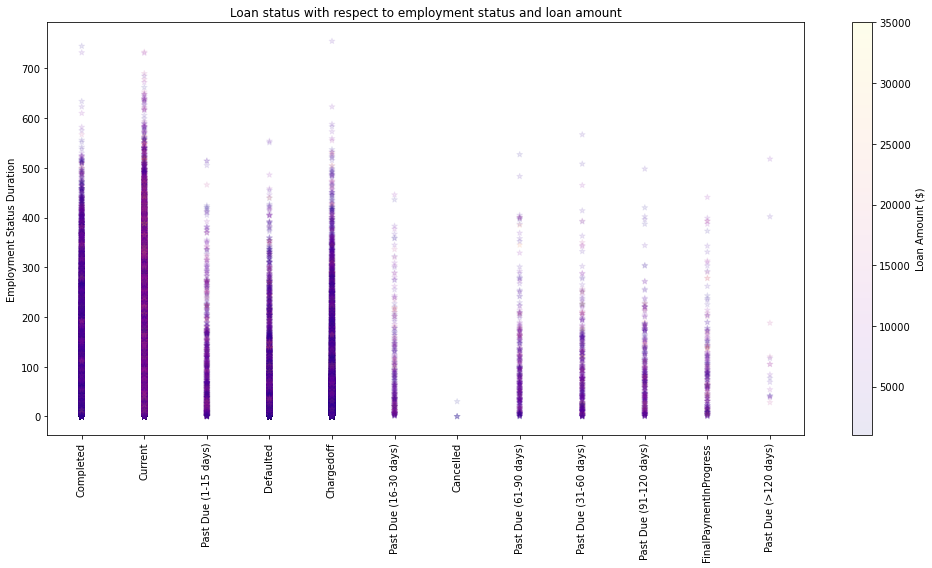

In [40]:


plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()
x = data_['LoanStatus']
y = data_['EmploymentStatusDuration']
s = ax.scatter(x, y,c = data_['LoanOriginalAmount'], marker='*', cmap='plasma', alpha = .09)
fig.colorbar(s, label = 'Loan Amount ($)')
plt.title("Loan status with respect to employment status and loan amount")
plt.ylabel("Employment Status Duration")
plt.xticks(rotation = 90);
plt.show()

Interestingly this shows that the employment status of the borrower has great impact on the laon status, those whoes loan has (Past due(>120days), cancealed, past (16-30days) tends to have a lower employment durations, which becomes more visible on the application of smaller alpha values to reduce the opacity of the chart

those who their loan status is (past due(1-15 days)) tends to have borrowed higher amount than others

# SUMMARY

Factors that affect a loan’s outcome status:
- 
greater population of those who completed their laons borrowed smaller ammount,and also PAST DUE(91-120 days), DEFAULTED and CHARGEDOFF are relatively from those who borrowed higher amount, therefore LoanOriginalAmount has great impact on the loan status
Some other features includes (EmploymentStatus, EmploymentStatusDuration)

What affects the borrower’s APR or interest rate?
- 
basically the Borroweers state and ListingCategory has a great impact on the borrowers annual percentage rate, also some other features includes which affects it are (the borrowers rate and loan origination amount)

Limitations
- 
based on the scope of this analysis, the above explorelations and insights where discovered, more insights will as be discovered when explored futher, since the analysis is based on 15 features out of the 81 features present in the dataset.

In [41]:
!jupyter nbconvert Part_II_exploration.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_exploration.ipynb to slides
[NbConvertApp] Writing 881347 bytes to Part_II_exploration.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_exploration.slides.html
Use Control-C to stop this server
^C

Interrupted
